# Artificial intelligence articles classification

## About the project

The project is about artificial intelligence articles classification. A classification according to the sepecific topic or sub-field of artificail intelligence discussed in each of these articles. And this based only on their abstracts.

## About Data

The data that will be used for this purpose is a dataset of articles(Theses,conference papers,journal articles...) collected from this [website](https://hal.archives-ouvertes.fr/) using a web scraper algorithm. The data is structered as follows:

- Article title
- Authors
- Abstract
- Structs
- Category 

Speaking now of the __Category__. This field contain the sub-field traited in the article and it can be one of the following *(computer vision,natural language processing,'evolutionary computation,robotics,speech recognition,expert systems,neural networks)*. As these are the main topics of artificial intelligence.

## Data cleaning and preprocessing

First we will import all the necessary python libraries for this project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Import data
Now that all the needed packages are there, we import our data from the excel file:

In [3]:
df = pd.read_excel ('myDataset.xlsx', dtype=object)

In [162]:
df.head()

,article_title,authors,abstract,structs,Category
0,en\nfr\nIntegrating Natural Language Processin...,"Prasanth Yalla 1 ,Nakul Sharma",Abstract : This paper tries to put various way...,koneru laxmiah education foundation,natural language processing
1,Benefits of proportionate selection in embodie...,"Nicolas Bredeche 1, 2 ,Jean-Marc Montanier 3 ,...","Abstract : We, as well as others, have already...","SU - Sorbonne Université,ISIR - Institut des ...",robotics
2,Bio-Inspired Computer Vision: Towards a Synerg...,"N V Kartheek Medathati 1 ,Heiko Neumann 2 ,Gui...",Abstract : Studies in biological vision have a...,BIOVISION - Biologically plausible Integrative...,computer vision
3,Associating Automatic Natural Language Process...,"Treveur Bretaudière 1 ,Samuel Cruz-Lara 1 ,Lin...",Abstract : We present our current research act...,SYNALP - Natural Language Processing : represe...,natural language processing
4,Exploration of learning analytics in education...,"Prima Chakma 1 ,Margarida Romero 2","Abstract : Due to the interaction of hardware,...","MSc SmartEdtech,LINE - Laboratoire d'Innovatio...",robotics


In [163]:
df.shape

(2280, 5)

In [4]:
df['abstract'][0]

'Abstract : This paper tries to put various ways in which Natural Language Processing (NLP) and Software Engineering (SE) can be seen as inter-disciplinary research areas. We survey the current literature, with the aim of assessing use of Software Engineering and Natural Language Processing tools in the researches undertaken. An assessment of how various phases of SDLC can employ NLP techniques is presented. The paper also provides the justification of the use of text for automating or combining both these areas. A short research direction while undertaking multidisciplinary research is also provided.'

### Categories encoding
Now that we have our data downloaded. Lets start our cleaning. 
First we will convert the categories of our articles to numerical Index. Then we store it in a new column __categoryId__

In [164]:
df['categoryId'] = df['Category'].factorize()[0]
df.head

<bound method NDFrame.head of                                           article_title  \
0     en\nfr\nIntegrating Natural Language Processin...   
1     Benefits of proportionate selection in embodie...   
2     Bio-Inspired Computer Vision: Towards a Synerg...   
3     Associating Automatic Natural Language Process...   
4     Exploration of learning analytics in education...   
...                                                 ...   
2275  Evaluation of air traffic complexity metrics u...   
2276  DIFFERENTIAL INVARIANTS FOR SE(2)-EQUIVARIANT ...   
2277  DIFFERENTIAL INVARIANTS FOR SE(2)-EQUIVARIANT ...   
2278  Deep Neural Networks with Prior Evidence for B...   
2279  Neural network regression for Bermudan option ...   

                                                authors  \
0                       Prasanth Yalla 1 ,Nakul Sharma    
1     Nicolas Bredeche 1, 2 ,Jean-Marc Montanier 3 ,...   
2     N V Kartheek Medathati 1 ,Heiko Neumann 2 ,Gui...   
3     Treveur Bretaudière

Let's now show all the categories of our dataset.

In [165]:
dataCategories = df[['Category', 'categoryId']].drop_duplicates().sort_values('categoryId')
dataCategories

,Category,categoryId
0,natural language processing,0
1,robotics,1
2,computer vision,2
929,speech recognition,3
930,evolutionary computation,4
932,expert systems,5
1770,neural networks,6


### Convert text to lower case
Now that we sure we have exactly 7 categories as we claimed earlier. Now we will convert text in the abstract column to lowercase. In fact all the traitments we will performe from onwards will be on the abstract field because its the one that will be feeded to our deep learning algorithm later. 

In [166]:
df['abstract'] = df['abstract'].astype(str)
def convert_lower(text):
   return text.lower()
df['abstract'] = df['abstract'].apply(convert_lower)
df['abstract'][1]


'abstract : we, as well as others, have already shown in previous works that reproductive isolation and a large population size are critical to achieve behavioral specialization in embodied evolutionary robotics. here, we extend our previous work from [3] by experimentally demonstrating that tness-proportionate and rank-based selection operators largely outperform other selection operators when it comes to evolving behavioral specialization.'

### Remove articles with no abstract found

Now we will get rid of all the articles with no abstract found. Also some articles have just a set of keywords in the abstract column. We will remove these rows too.

In [167]:
for i,x in df.iterrows():
    if len(x['abstract'].split())<15:
        df=df.drop(i)

df.shape

(2145, 6)

### Remove the special characters and the stopwords

Our data must be clean of all the special characters that carries no important informations for our model. And also should be clean of any stopword such as (the,a,an,in...). In fact these words are frequent in any text and will not contribute in building any knowledge for our algorithm. 
We can also see the word __abstract__ in every article abstract and also the words __en__ __fr__. So we also want to get rid of these words so our data will contain only meaningful words.
And finally when this data was collected. There was also abstarcts provided only in french. So we also want to remove these articles with french abstract (Resume).

In [168]:
def special_char(text):
  abstract = ''
  for x in text:
    if x=='resume':
        abstract='no abstract'
        break
    elif x.isalnum():
      abstract = abstract + x
    else:
      abstract = abstract + ' '
  return abstract
df['abstract'] = df['abstract'].apply(special_char)

def remove_useless_words(text):
    x=text.split()
    abstract=''
    for word in x:
        if word not in ['abstract','en','fr','paper']:
            abstract+=word+' '        
    return abstract
df['abstract'] = df['abstract'].apply(remove_useless_words)

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
df['abstract'] = df['abstract'].apply(remove_stopwords)
df['abstract'][0]




            

['tries',
 'put',
 'various',
 'ways',
 'natural',
 'language',
 'processing',
 'nlp',
 'software',
 'engineering',
 'se',
 'seen',
 'inter',
 'disciplinary',
 'research',
 'areas',
 'survey',
 'current',
 'literature',
 'aim',
 'assessing',
 'use',
 'software',
 'engineering',
 'natural',
 'language',
 'processing',
 'tools',
 'researches',
 'undertaken',
 'assessment',
 'various',
 'phases',
 'sdlc',
 'employ',
 'nlp',
 'techniques',
 'presented',
 'also',
 'provides',
 'justification',
 'use',
 'text',
 'automating',
 'combining',
 'areas',
 'short',
 'research',
 'direction',
 'undertaking',
 'multidisciplinary',
 'research',
 'also',
 'provided']

### Word Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.  lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [169]:
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
df['abstract'] = df['abstract'].apply(lemmatize_word)
print(df['abstract'][0])

try put various way natural language processing nlp software engineering se seen inter disciplinary research area survey current literature aim assessing use software engineering natural language processing tool research undertaken assessment various phase sdlc employ nlp technique presented also provides justification use text automating combining area short research direction undertaking multidisciplinary research also provided


### Data visualization

Now after our data is finally cleaned and it contains only useful informations. Let's process some data visualization. Practicly, we want to see the category distribution of our data and also the main vocabulary of each one of those categories.

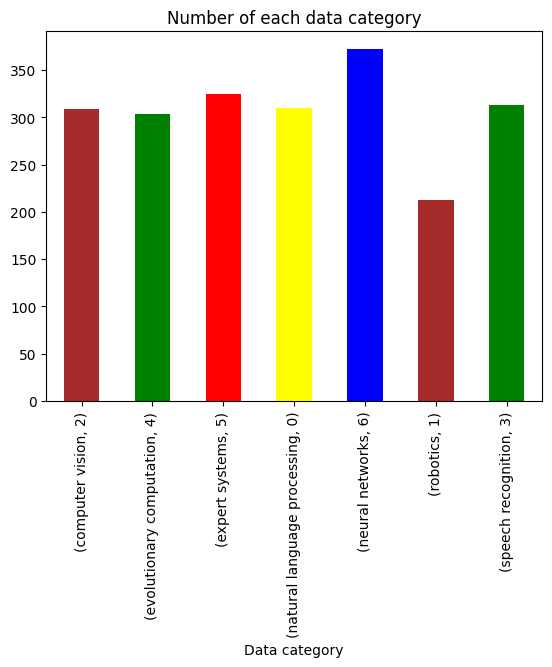

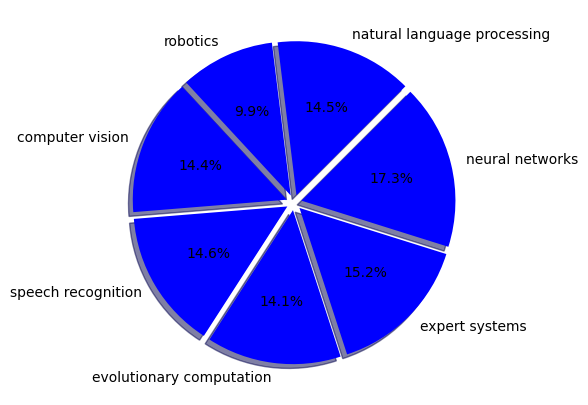

In [170]:
df.groupby('Category').categoryId.value_counts().plot(kind = "bar", color = ["brown", "green", "red", "yellow", "blue"])
plt.xlabel("Data category")
plt.title("Number of each data category")
plt.show()

fig = plt.figure(figsize = (5,5))
colors = ["blue"]
natural_language_processing = df[df['categoryId'] == 0 ]
robotics = df[df['categoryId'] == 1 ]
computer_vision = df[df['categoryId'] == 2]
speech_recognition = df[df['categoryId'] == 3]
evolutionary_computation = df[df['categoryId'] == 4]
expert_systems = df[df['categoryId'] == 5]
neural_networks = df[df['categoryId'] == 6]
count = [natural_language_processing['categoryId'].count(), robotics['categoryId'].count(), computer_vision['categoryId'].count(), speech_recognition['categoryId'].count(), evolutionary_computation['categoryId'].count(),expert_systems['categoryId'].count(),neural_networks['categoryId'].count()]
pie = plt.pie(count, labels = ['natural language processing', 'robotics', 'computer vision', 'speech recognition', 'evolutionary computation','expert systems','neural networks'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05))


There is also a very cool tool to show the frequency of words of each category which is wordCloud library.
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud

natural language processing related words:


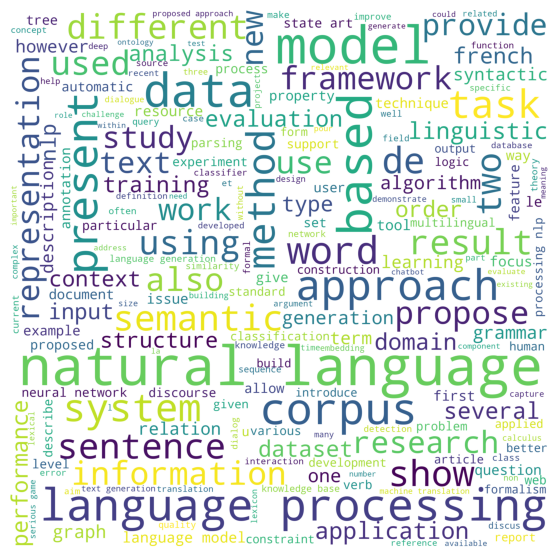

robotics related words:


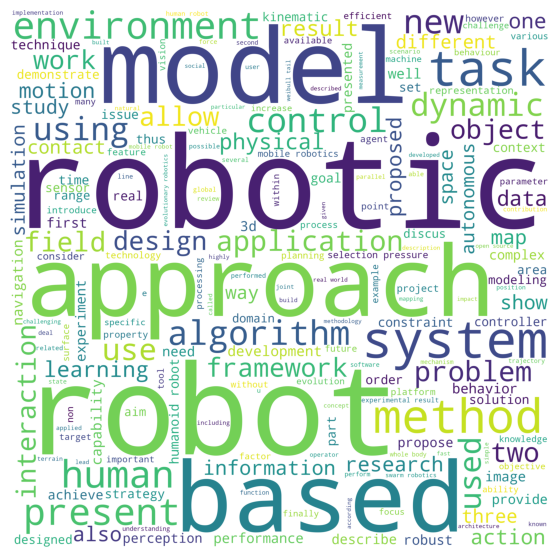

computer vision related words:


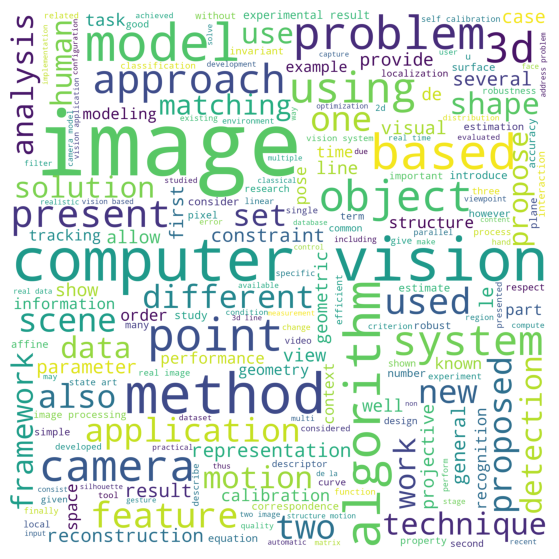

speech recognition related words:


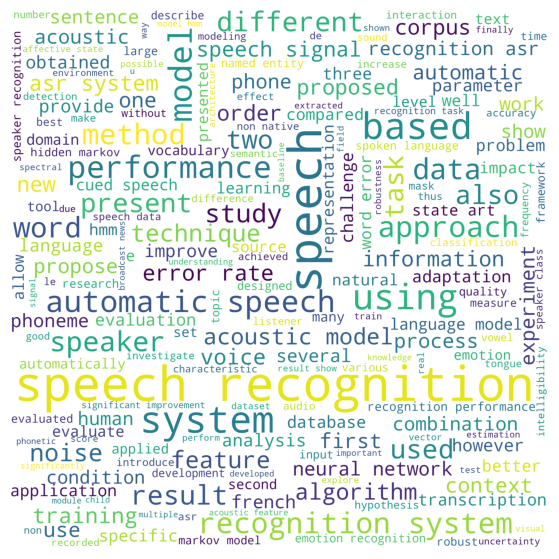

evolutionary computation related words:


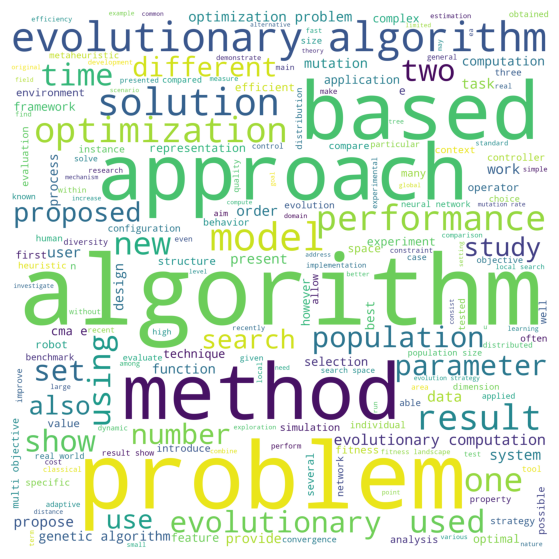

expert systems related words:


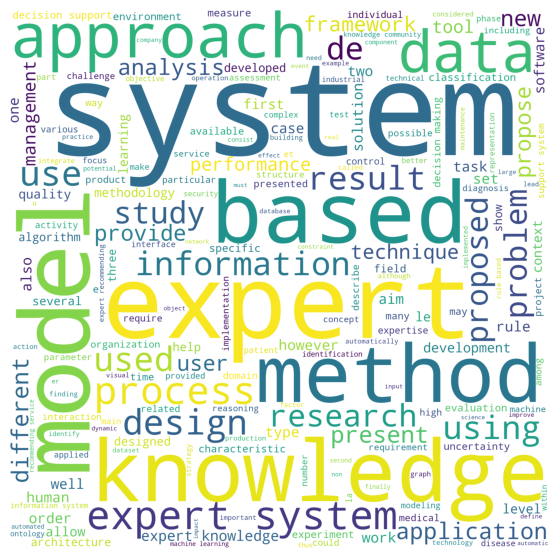

neural networks related words:


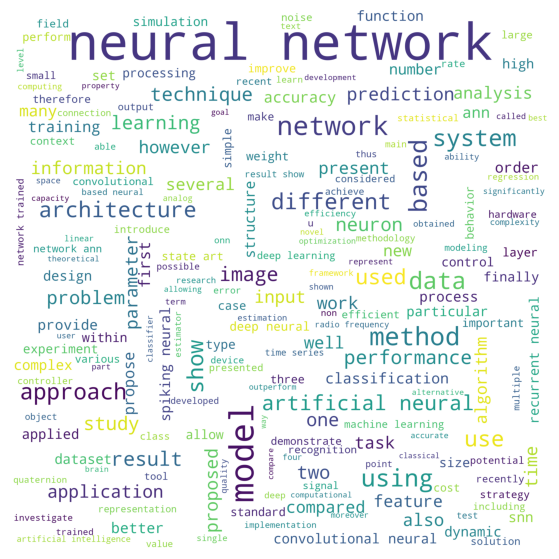

In [171]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

natural_language_processing = df[df['categoryId'] == 0 ]

natural_language_processing = natural_language_processing['abstract']

robotics = df[df['categoryId'] == 1 ]

robotics = robotics['abstract']

computer_vision = df[df['categoryId'] == 2]

computer_vision = computer_vision['abstract']

speech_recognition = df[df['categoryId'] == 3]

speech_recognition = speech_recognition['abstract']

evolutionary_computation = df[df['categoryId'] == 4]

evolutionary_computation = evolutionary_computation['abstract']

expert_systems = df[df['categoryId'] == 5]

expert_systems = expert_systems['abstract']

neural_networks = df[df['categoryId'] == 6]

neural_networks = neural_networks['abstract']

def wordcloud_draw(dataset, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()

print("natural language processing related words:")

wordcloud_draw(natural_language_processing, 'white')

print("robotics related words:")

wordcloud_draw(robotics, 'white')

print("computer vision related words:")

wordcloud_draw(computer_vision, 'white')

print("speech recognition related words:")

wordcloud_draw(speech_recognition, 'white')

print("evolutionary computation related words:")

wordcloud_draw(evolutionary_computation, 'white')

print("expert systems related words:")

wordcloud_draw(expert_systems, 'white')

print("neural networks related words:")

wordcloud_draw(neural_networks, 'white')


**After these data vizualisation we performed we now have a very clear image of our dataset and its content. Now we will move to another stage where we will prepare our data to be feeded to our deep learning algorithms.**

### Bag of words

Bag of words model is a methode of feature extracting or feature encoding. It is in fact one of the the most used methods for this purpose in problems such as ours _(document classification)_.
The idea behind this model is encode a sequence based on all the vocabulary of our dataset. In other words, if a word is frequent in a document we set its correspondant value in  the sequence vector to 1 and 0 if not.

Lets now generate our bag of words of our dataset.

In [172]:
from sklearn.feature_extraction.text import CountVectorizer
x = df['abstract']
y = df['categoryId']
x = np.array(df.iloc[:,2].values)
y = np.array(df.categoryId.values)
cv = CountVectorizer(max_features = 13000)
x = cv.fit_transform(df.abstract).toarray()
print(cv.vocabulary_)
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)


{'try': 11345, 'put': 8835, 'various': 11722, 'way': 11917, 'natural': 7322, 'language': 6234, 'processing': 8637, 'nlp': 7470, 'software': 10225, 'engineering': 3876, 'se': 9826, 'seen': 9864, 'inter': 5844, 'disciplinary': 3341, 'research': 9383, 'area': 941, 'survey': 10732, 'current': 2830, 'literature': 6453, 'aim': 616, 'assessing': 1027, 'use': 11646, 'tool': 11144, 'undertaken': 11497, 'assessment': 1028, 'phase': 8183, 'sdlc': 9824, 'employ': 3807, 'technique': 10901, 'presented': 8554, 'also': 695, 'provides': 8768, 'justification': 6110, 'text': 10983, 'automating': 1183, 'combining': 2185, 'short': 10032, 'direction': 3316, 'undertaking': 11498, 'multidisciplinary': 7209, 'provided': 8766, 'well': 11949, 'others': 7829, 'already': 693, 'shown': 10045, 'previous': 8590, 'work': 12030, 'reproductive': 9364, 'isolation': 6039, 'large': 6245, 'population': 8405, 'size': 10140, 'critical': 2766, 'achieve': 422, 'behavioral': 1341, 'specialization': 10302, 'embodied': 3773, 'evol

### Train and test our model

First we need to split our dataset into train and test sets so we can evaluate the performance of our model.

In [173]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)
print(len(x_train))
print(len(x_test))

1501
644


In [174]:
mdl = LogisticRegression()

oneVsRest = OneVsRestClassifier(mdl)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'F1-score : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')


F1-score : 93.32
Precision : 0.9332298136645962
Recall : 0.9332298136645962
F1-score : 0.9332298136645962


In [175]:
mdl1 = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0)

oneVsRest1 = OneVsRestClassifier(mdl1)
oneVsRest1.fit(x_train, y_train)
y_pred = oneVsRest1.predict(x_test)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'F1-score : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

F1-score : 91.93
Precision : 0.9192546583850931
Recall : 0.9192546583850931
F1-score : 0.9192546583850931


In [176]:
def data_cleaning(abstract_):
    abstract_=special_char(abstract_)
    abstract_=convert_lower(abstract_)
    abstract_=remove_stopwords(abstract_)
    abstract_=lemmatize_word(abstract_)
    x=[abstract_]
    x=cv.transform(x).toarray()
    print(x.shape)
    return x
text=' When faced with a specific optimization problem, deciding which algorithm to apply is always a difficult task. Not only is there a vast variety of algorithms to select from, but these algorithms are often controlled by many hyperparameters, which need to be suitably tuned in order to achieve peak performance. Usually, the problem of selecting and configuring the optimization algorithm is addressed sequentially, by first selecting a suitable algorithm and then tuning it for the application at hand. Integrated approaches, commonly known as Combined Algorithm Selection and Hyperparameter (CASH) solvers, have shown promise in several applications. In this work we compare sequential and integrated approaches for selecting and tuning the best out of the 4,608 variants of the modular Covariance Matrix Adaptation Evolution Strategy (CMAES). We show that the ranking of these variants depends to a large extent on the quality of the hyperparameters. Sequential approaches are therefore likely to recommend sub-optimal choices. Integrated approaches, in contrast, manage to provide competitive results at much smaller computational cost. We also highlight important differences in the search behavior of two CASH approaches, which build on racing (irace) and on model-based optimization (MIP-EGO), respectively.'
text=data_cleaning(text)
print(text.shape)
oneVsRest.predict(text)

(1, 12123)
(1, 12123)


array([4], dtype=int64)

In [177]:
mdl2 = DecisionTreeClassifier()
oneVsRest2 = OneVsRestClassifier(mdl2)
oneVsRest2.fit(x_train, y_train)
y_pred = oneVsRest2.predict(x_test)
precision, recall, f1score, support = score(y_test, y_pred, average='micro')
accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

print(f'F1-score : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

F1-score : 86.02
Precision : 0.860248447204969
Recall : 0.860248447204969
F1-score : 0.860248447204969


In [178]:
text=' When faced with a specific optimization problem, deciding which algorithm to apply is always a difficult task. Not only is there a vast variety of algorithms to select from, but these algorithms are often controlled by many hyperparameters, which need to be suitably tuned in order to achieve peak performance. Usually, the problem of selecting and configuring the optimization algorithm is addressed sequentially, by first selecting a suitable algorithm and then tuning it for the application at hand. Integrated approaches, commonly known as Combined Algorithm Selection and Hyperparameter (CASH) solvers, have shown promise in several applications. In this work we compare sequential and integrated approaches for selecting and tuning the best out of the 4,608 variants of the modular Covariance Matrix Adaptation Evolution Strategy (CMAES). We show that the ranking of these variants depends to a large extent on the quality of the hyperparameters. Sequential approaches are therefore likely to recommend sub-optimal choices. Integrated approaches, in contrast, manage to provide competitive results at much smaller computational cost. We also highlight important differences in the search behavior of two CASH approaches, which build on racing (irace) and on model-based optimization (MIP-EGO), respectively.'
text=data_cleaning(text)
print(text.shape)Precision : 0.860
oneVsRest2.predict(text)

(1, 12123)
(1, 12123)


array([6], dtype=int64)

## Cross validation
So in the sections above we tested three different classifers (LogisticRegression,RandomForest,DecisionTree) and we can notice that the one with the highest accuracy is LogisticRegression. So we will stick with this classifier and we will try to do better with it in terms of accuracy Let's now look for the optimal hyperparameter C(The inverse of regularisation strength):

In [179]:
from sklearn import model_selection
# Select 6 values of C
C_range = np.logspace(-2, 3, 6)
estimator_range=[LogisticRegression(C=i) for i in C_range]
# Parameter grid
param_grid = {'estimator': estimator_range}
# Best model selection criteria
score = 'accuracy'
# Initialize a grid search
grid = model_selection.GridSearchCV(,
param_grid,
cv=5, # 5 folds de validation croisée
scoring=score)
# Train the model
grid.fit(x_train, y_train)
# Show optimal parameters
print("The optimal estimators are {} with a score of {:.2f}".format(grid.best_params_, grid.best_score_))

SyntaxError: invalid syntax (3678208244.py, line 10)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5, max_df = 0.5, sublinear_tf = True, ngram_range = (1, 1))
vectorizer.fit(df.abstract)
x_ = np.array(df.iloc[:,2].values)
y_ = np.array(df.categoryId.values)
x_=vectorizer.transform(df.abstract)

x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x, y, test_size = 0.3, random_state = 0, shuffle = True)

print(x_train_tfidf.shape, y_train_tfidf.shape)
print(x_test_tfidf.shape, y_test_tfidf.shape)

In [ ]:


oneVsRest = OneVsRestClassifier(LogisticRegression())
oneVsRest.fit(x_train_tfidf, y_train_tfidf)
y_pred_tfidf = oneVsRest.predict(x_test_tfidf)
precision, recall, f1score, support = score(y_test_tfidf, y_pred_tfidf, average='micro')
accuracy = round(accuracy_score(y_test_tfidf, y_pred_tfidf) * 100, 2)

print(f'F1-score : {accuracy}')
print(f'Precision : {precision}')
print(f'Recall : {recall}')
print(f'F1-score : {f1score}')

## Deep learning 
Now we will try to implement our solution with deep learning using Keras framework to see if we will acheive better results than the previous algorithms 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

The `Embedding` layer takes as input a 2D tensor of integers, of size `number of sequences` x `length of a sequence`.

All sequences in a bacth (of sequences) must have the same length, even if it means truncating or completing with zeros the sequences that are too long or too short.

This layer returns a 3D tensor of numerical values of size `number of sequences` x `length of a sequence` x `dim of arrival of the fold`. 

These 3D tensors can then be connected to recurrent or convolutional layers.



Now we will Build a forward propagation network as follows:
- An embedding layer that plunges each word into a space of dimension 10.
- A Flatten layer to resize the 3D tensor of dives into a 2D tensor of size `nb of sequences` x (10*12000)  
- A dense layer with sigmoid activation for the final classification.

In [247]:
from keras.layers import Flatten,Dense,LSTM
from keras import Sequential

model=Sequential()
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(7,activation='softmax'))

We then use an `rmsprop` optimizer with `binary_crossentropy` loss and `acc` (accuracy) metric tracking along the optimization process.

In [248]:
model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam',metrics='acc')

After, we display the summary of the neural network thus constructed and make sure we understand the dimensions displayed

In [239]:
model.build(x_train_tfidf_trans.shape)
model.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (1501, 20)                30020     
                                                                 
 dense_88 (Dense)            (1501, 20)                420       
                                                                 
 dense_89 (Dense)            (1501, 7)                 147       
                                                                 
Total params: 30,587
Trainable params: 30,587
Non-trainable params: 0
_________________________________________________________________


Now it's time to train our model on the training data 

In [210]:
from keras.preprocessing.text import Tokenizer
my_tokenizer = Tokenizer(num_words=1000) 
my_tokenizer.fit_on_texts(df['abstract'])
sequences = my_tokenizer.texts_to_sequences(df['abstract'])

from keras_preprocessing.sequence import pad_sequences
x_train_tfidf_trans=pad_sequences(x_train_tfidf,maxlen=1500)
x_test_tfidf_trans=pad_sequences(x_test_tfidf,maxlen=1500)


In [255]:
history=model.fit(x_train_tfidf_trans,y_train_tfidf,batch_size=250,epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 19ms/step - loss: 0.1103 - acc: 0.9707
Epoch 2/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1092 - acc: 0.9707
Epoch 3/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1082 - acc: 0.9714
Epoch 4/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1086 - acc: 0.9720
Epoch 5/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1124 - acc: 0.9740
Epoch 6/20
7/7 [==============================] - 0s 5ms/step - loss: 0.1105 - acc: 0.9734
Epoch 7/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1112 - acc: 0.9707
Epoch 8/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1106 - acc: 0.9694
Epoch 9/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1120 - acc: 0.9714
Epoch 10/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1177 - acc: 0.9680
Epoch 11/20
7/7 [==============================] - 0s 7ms/step - loss: 0.1179 - acc: 0.9

{'loss': [0.08897313475608826,
  0.09018619358539581,
  0.09064984321594238,
  0.08979075402021408,
  0.0884731188416481,
  0.08725402504205704,
  0.0861428901553154,
  0.08545858412981033,
  0.08499232679605484,
  0.08441776782274246,
  0.08381637930870056,
  0.08313774317502975,
  0.08296526223421097,
  0.08263920992612839,
  0.08212419599294662,
  0.08222061395645142,
  0.0813431590795517,
  0.08110228180885315,
  0.08042005449533463,
  0.07995735853910446],
 'acc': [0.9753497838973999,
  0.9746835231781006,
  0.9746835231781006,
  0.9753497838973999,
  0.9746835231781006,
  0.9753497838973999,
  0.9753497838973999,
  0.9753497838973999,
  0.9746835231781006,
  0.9753497838973999,
  0.9760159850120544,
  0.9760159850120544,
  0.9753497838973999,
  0.976682186126709,
  0.976682186126709,
  0.9753497838973999,
  0.976682186126709,
  0.9760159850120544,
  0.976682186126709,
  0.9753497838973999]}

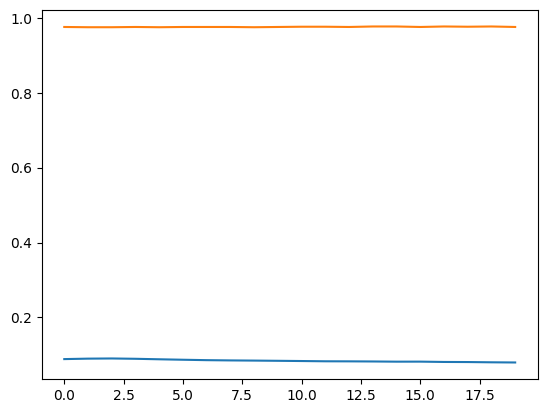

In [182]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['acc'],label='acc')
history.history

## Working with LSTMs
Now we will try to build a model with an LSTM layer to see if it will perform better than the previous model with only fully connected dense layers

In [ ]:
reseau=keras.Sequential()
reseau.add(layers.LSTM(units=1500, return_sequences=False,input_shape=(1,x_train_tfidf.shape[0], x_train_tfidf.shape[0])))
reseau.add(layers.Dense(20,activation='relu'))
reseau.add(layers.Dense(7,activation='softmax'))
x_train_tfidf_trans.shape



In [ ]:
reseau.summary()

In [ ]:
reseau.compile(loss='sparse_categorical_crossentropy',metrics='acc')
history1=reseau.fit(x_train_tfidf_trans,y_train_tfidf)
print(history1.history['acc'][-1])